In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import BernoulliRBM
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline

# RBM - Redução da Dimensionalidade de Imagens

In [3]:
# Carregando base de dados
base = datasets.load_digits()
previsores = np.asarray(base.data, 'float32')
classe = base.target

In [4]:
# Normalizando 
normalizador = MinMaxScaler(feature_range = (0, 1))
previsores = normalizador.fit_transform(previsores)

# Separando dados de treino e teste
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.2, random_state = 0)

In [5]:
# Criando RBM
rbm = BernoulliRBM(random_state = 0)
# Números de epochs
rbm.n_iter = 25
# Números de neurônios da camada escondida
rbm.n_components = 50

# Naive Bayes
naive_rbm = GaussianNB()

classificador_rbm = Pipeline(steps = [('rbm', rbm), ('naive', naive_rbm)])
classificador_rbm.fit(previsores_treinamento, classe_treinamento)

Pipeline(steps=[('rbm',
                 BernoulliRBM(n_components=50, n_iter=25, random_state=0)),
                ('naive', GaussianNB())])

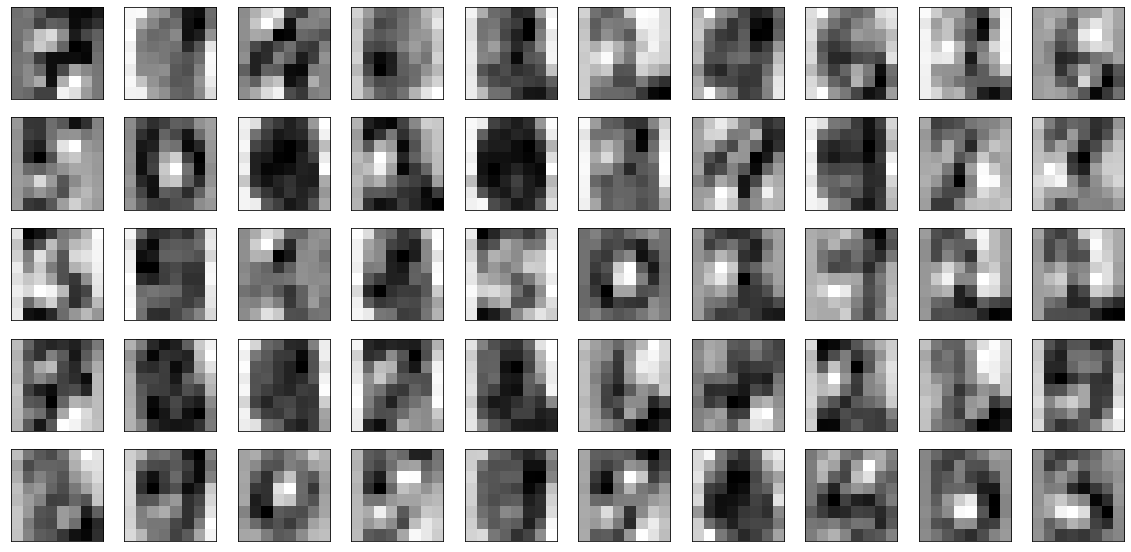

In [6]:
# Vizualizando imagens
plt.figure(figsize = (20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((8, 8)), cmap = plt.cm.gray_r)
    plt.xticks(())
    plt.yticks(())
plt.show()

In [9]:
# Predict
previsoes_rbm = classificador_rbm.predict(previsores_teste)
previsoes_rbm

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       2, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 8, 9, 4, 3, 8, 0, 1, 8, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 9, 8, 6, 3, 0, 2, 3, 4, 1, 3,
       7, 6, 9, 8, 8, 3, 5, 1, 2, 8, 2, 2, 9, 7, 2, 3, 6, 0, 5, 3, 7, 5,
       1, 2, 9, 9, 3, 1, 7, 7, 4, 8, 5, 8, 5, 5, 2, 5, 9, 0, 7, 1, 4, 5,
       3, 4, 8, 9, 7, 7, 8, 9, 1, 9, 2, 5, 8, 4, 6, 7, 0, 6, 8, 5, 1, 9,
       9, 5, 9, 9, 5, 7, 5, 6, 2, 8, 6, 9, 6, 1, 5, 8, 5, 9, 9, 1, 5, 3,
       6, 8, 8, 9, 7, 7, 6, 3, 6, 5, 6, 0, 8, 8, 9, 3, 6, 1, 0, 4, 2, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 3, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 2, 9,
       6, 4, 5, 0, 1, 4, 6, 4, 3, 3, 0, 9, 5, 3, 2, 9, 4, 1, 1, 6, 8, 9,
       2, 4, 9, 3, 7, 6, 2, 3, 3, 8, 6, 9, 3, 6, 3, 9, 2, 0, 7, 6, 1, 1,
       9, 7, 2, 7, 8, 5, 5, 7, 5, 2, 3, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 2, 6, 8, 8, 8, 4, 6, 7, 5, 2, 4,
       5, 3, 2, 4, 6, 9, 4, 5, 4, 3, 4, 6, 2, 9, 0,

In [11]:
# Accuracy score
precisao_rbm = metrics.accuracy_score(previsoes_rbm, classe_teste)
precisao_rbm

0.8944444444444445

In [12]:
# Executando Naive Bayes sem RBM, para comparativo
naive_simples = GaussianNB()
naive_simples.fit(previsores_treinamento, classe_treinamento)

GaussianNB()

In [13]:
previsoes_naive = naive_simples.predict(previsores_teste)
previsoes_naive

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8, 8, 7,
       8, 4, 7, 5, 4, 9, 2, 9, 4, 7, 6, 1, 9, 4, 3, 1, 0, 1, 1, 6, 7, 7,
       1, 0, 7, 6, 2, 1, 9, 6, 7, 9, 0, 0, 5, 1, 6, 3, 0, 2, 3, 4, 1, 9,
       8, 6, 8, 8, 8, 3, 5, 1, 2, 1, 2, 1, 9, 7, 1, 3, 6, 0, 5, 3, 7, 5,
       1, 8, 9, 9, 3, 1, 7, 7, 4, 8, 5, 1, 5, 5, 8, 5, 8, 0, 7, 1, 7, 7,
       3, 7, 8, 9, 7, 7, 8, 1, 6, 5, 8, 5, 5, 4, 1, 7, 0, 6, 8, 5, 8, 1,
       1, 5, 9, 9, 5, 7, 5, 6, 8, 8, 6, 7, 6, 1, 5, 1, 7, 9, 9, 1, 5, 3,
       6, 1, 8, 9, 7, 7, 6, 7, 6, 5, 6, 0, 8, 8, 3, 8, 6, 1, 0, 7, 1, 6,
       3, 8, 6, 7, 4, 9, 6, 3, 0, 2, 3, 3, 0, 7, 7, 5, 7, 8, 0, 7, 1, 9,
       6, 4, 7, 0, 1, 4, 6, 4, 3, 8, 0, 9, 5, 3, 1, 1, 4, 1, 1, 6, 1, 9,
       1, 4, 9, 3, 7, 6, 8, 3, 3, 1, 6, 9, 8, 6, 3, 1, 2, 0, 7, 6, 1, 1,
       8, 7, 1, 7, 1, 5, 5, 7, 5, 3, 8, 7, 2, 7, 5, 5, 7, 0, 9, 1, 6, 5,
       9, 7, 4, 3, 8, 0, 3, 6, 4, 6, 3, 1, 6, 8, 8, 8, 4, 6, 7, 5, 2, 1,
       7, 3, 8, 4, 6, 9, 4, 5, 7, 3, 4, 6, 2, 8, 0,

In [14]:
precisao_naive = metrics.accuracy_score(previsoes_naive, classe_teste)
precisao_naive

0.8111111111111111